# Questions
1- Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

- No, It's not good, because the model is stateless, also since the sequential data is dependent on each other, but the neural network assumes that the data is non-sequential, it isloate features from each other and start training each feature alone, also it's not good for image preprocessing and classification, because it's not good at image feature extraction, and there will be a lot of learnable parameters and that may cause overfitting.
# _________________________________________________________________

2- What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

- They are unstable behaviourx happen while model goes backward to learn, gradient vanishing, the gradient get smaller and smaller get smaller and smaller untill it reach to zero, on other hand, gradient explosion, the gradient get larger and larger and this will make weights updated to worset and worset values.

- LSTM has three gates (forget gate, input gate, output gate [outputs a prediction vector h(x) at k-th time step]), As a result, LSTM features a distinct gradient structure that allows direct access to the activations of the forget gate, allowing the network to encourage desired behaviour from the error gradient via frequent gate updates at each time step of the learning process, and then throw cell state (∂st'∂st=∏t1t'-tσ(vt+k)) ,vt the output of forget state but still LSTM will suffer from vanishing gradients as well, also LSTM's activation function has the derivative of 1 so it won't neither vanish or explode.

- GRU also has similar sturcture of LSTM but with only 2 Gates (reset and update gate) it handel vanishing and exploding gradient a little bit better than LSTM but it may also suffer from this problem.

# _________________________________________________________________
3- What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?

- Multi-task learning (MTL) is a machine learning discipline in which numerous learning problems are handled concurrently, in other hand Multi-Modality learning makes use of data from multiple sources to produce intelligent predictions, in this assignment we have a special dataset where we have two inputs (summary and image of some real estates) and (type and categorical price of this real estates) I leveraged from these types of learning and I built a model and trained it on these inputs at the same time, and I could predict the values of type and price of the state.

# _________________________________________________________________

4- What is the difference among xgboost, lightgbm and catboost?

- All of these algorithms lies under gradient boosting algorithm. They differ in their implementation of the boosted trees algorithm, as well as their technological compatibility and limits, Trees grow depth-wise in XGBoost, while trees grow leaf-wise in LightGBM, for substitution,

- lightGBM supports gradient-based one-sided sampling (GOSS), which selects the split by combining all instances with big gradients (i.e., large errors) and a random sample of examples with small gradients. To maintain the same data distribution when calculating the information gain.

- Catboost offers a new technique called Minimal Variance Sampling (MVS), which is a weighted sampling version of Stochastic Gradient Boosting. Catboost provides the Minimal Variance Sample (MVS) technique, which is a weighted sampling variation of Stochastic Gradient Boosting,

- Xgboosting doesn't introduce any weighted sampling techniques..

# Problem formulation
When hosts prepare to post a new advertisement about residence place on the Airbnb site is, how much should they ask for?, How much of this apartment?, etc, also for guests, they want to find a suitable place to stay at it affordable price..., So we want to build a neural network model to make predict the type of real estate and its price, our inputs here are summary for this real estate and its image and the outputs here are a type of this real estate and its price. (training dataset:- 7627 samples), (test dataset:- 7360 samples).

Note:- you will find the dataset at https://www.kaggle.com/competitions/cisc-873-dm-f22-a4
# Challengs:
- The size of training dataset is approximately equal to test dataset and it will be smaller when we drop null and duplicated values from training dataset.
- Null values in summary feature in training dataset.
- summary feature in both training dataset and test dataset is multilingual.
- imbalanced labels distribution.
- multi-prediction problem.
- huge time taken to train with cpu.


# Impact:
It will help hosts to put the true and suitable price for their residence place and that will increase their sales, also it will help guests to predict the night price for the place that they are looking for it to stay in it at holidays or in the work trip days.

# Data mining function:
- load the data from the source.
- preprocess and manipulating the data.
- build and train the model.
- classification and prediction.
- get insights from the results.


# Ideal solution:
For me using a bert model (pre-trained model) was a great choice, it got the highest score for me on kaggle, and I think that's because a lot of learnable parameters.

Actually this model is the best model that you can use it for this kind of problems, bert model is a great semantic and that because a lot of learnable parameters, more than 108 million trainable parameters. kaggle score (68.546), and I could got better result if I tried to tune the hyperparameters of this model.

# Experimental protocol
1. load train and test data.
2. some visualization and description to understand the data.
3. preprocessing the data

A.preprocessing the data to build models from scratch.

   a. translate text data. (summary feature).
   
   b.remove null and duplicated values from summary feature in training dataset.
   
   c.translate summary feature (because it's multilingual data).
   
   d.resize images into (64*64*3) shape (to preserve more features as we could).
   
   e.tokenize each text data in summary feature.
   
   f.convert each text into unique id sequence.
   
 B.preprocessing the data to build a pre-trained model.
 
   a.translate text data. (summary feature).
   
   b.remove null and duplicated values from summary feature in training dataset.
   
   c.translate summary feature (because it's multilingual data).
   
   d.tokenize each text data in summary feature with pre-trained tokenizer.
   
   e.convert each text into unique id sequence.
   
4. build models and plot them.
5. train each model.
6. plot each model on training loss and validation loss.
7. plot each model on training accuracy and validation accuracy.

In [ ]:
import os
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np
from ast import literal_eval
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras import optimizers , Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
#from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D , Dropout , LSTM , GRU, Embedding , Bidirectional , TimeDistributed, SpatialDropout1D
from tensorflow.keras.optimizers import Adam , RMSprop
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
     

     

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c Copy-of-CISC-873-DM-W23-A4
! unzip Copy-of-CISC-873-DM-W23-A4

Streaming output truncated to the last 5000 lines.
  inflating: a4/img_train/3366.jpg   
  inflating: a4/img_train/3367.jpg   
  inflating: a4/img_train/3368.jpg   
  inflating: a4/img_train/3369.jpg   
  inflating: a4/img_train/337.jpg    
  inflating: a4/img_train/3370.jpg   
  inflating: a4/img_train/3371.jpg   
  inflating: a4/img_train/3372.jpg   
  inflating: a4/img_train/3373.jpg   
  inflating: a4/img_train/3374.jpg   
  inflating: a4/img_train/3375.jpg   
  inflating: a4/img_train/3376.jpg   
  inflating: a4/img_train/3377.jpg   
  inflating: a4/img_train/3378.jpg   
  inflating: a4/img_train/3379.jpg   
  inflating: a4/img_train/338.jpg    
  inflating: a4/img_train/3380.jpg   
  inflating: a4/img_train/3381.jpg   
  inflating: a4/img_train/3382.jpg   
  inflating: a4/img_train/3383.jpg   
  inflating: a4/img_train/3384.jpg   
  inflating: a4/img_train/3385.jpg   
  inflating: a4/img_train/3386.jpg   
  inflating: a4/img_train/3387.jpg   
  inflating: a4/img_train/3388.jpg   

In [ ]:
#read train & test files
df_train  = pd.read_csv('/content/a4/train_xy.csv')
df_test =pd.read_csv('/content/a4/test_x.csv' , index_col='id')

In [ ]:

#display the first five rows from train file
df_train.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:

#display the first five rows from test file
df_test.head()

,summary,image
id,,
0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg


### ✔️ Data Exploration

In [ ]:
#display the first advertisement in train file
df_train['summary'][0]

'Spacious, sunny and cozy modern apartment in the heart of Montreal. This 3 bedroom centrally located in the very popular Plateau Mont-royal neighborhood in the middle of prince-arthur pedestrian-only street. Close to all amenities ( Restaurants, coffee house, bars, clubs, shopping, universities, subway stations). Experience Montreal like a real local resident, be in the heart of the action: grand prix week, grill Saint-Laurent festival, mural 2019 and so much more!'

In [ ]:

#shape of train file
df_train.shape

(7627, 4)

In [ ]:
#display the count of each unique values in thev column
df_train['type'].value_counts()

Apartment                 5765
Condominium                691
House                      406
Loft                       324
Townhouse                  167
Serviced apartment          77
Bed and breakfast           38
Guest suite                 32
Hostel                      26
Bungalow                    25
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        7
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: type, dtype: int64

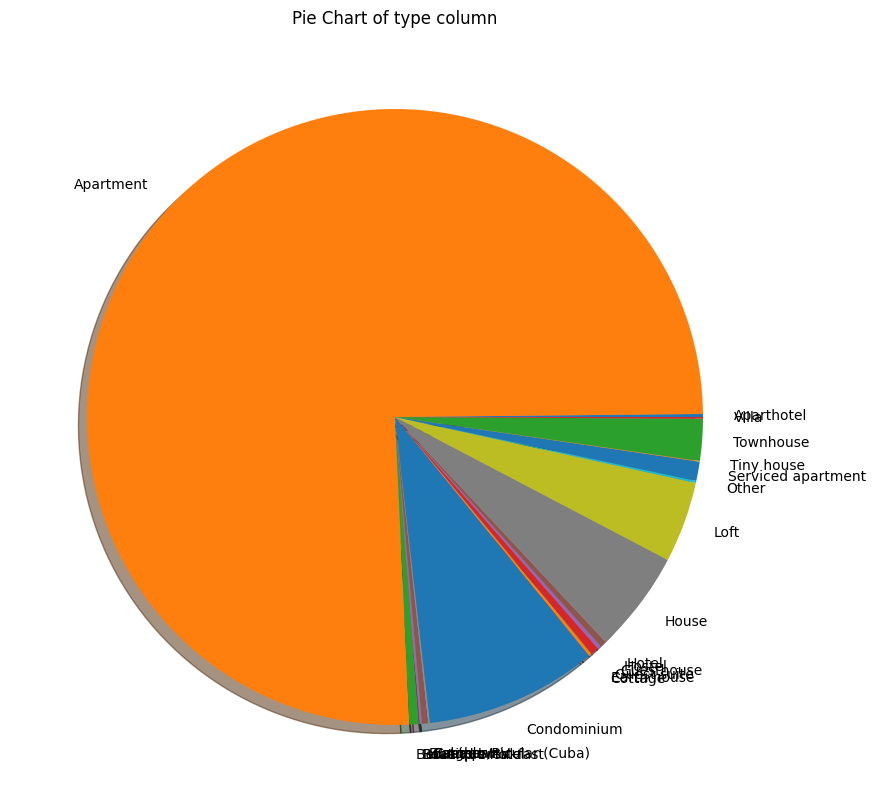

In [ ]:
#display type column unique values
typee = df_train.groupby('type').size()

# Make the plot with pandas
typee.plot(kind='pie', subplots=True, figsize=(30, 10),shadow=True)
plt.title("Pie Chart of type column")
plt.ylabel("")
plt.show()

In [ ]:
#display the count of each unique values in thev column
df_train['price'].value_counts()

0    4737
1    2403
2     487
Name: price, dtype: int64

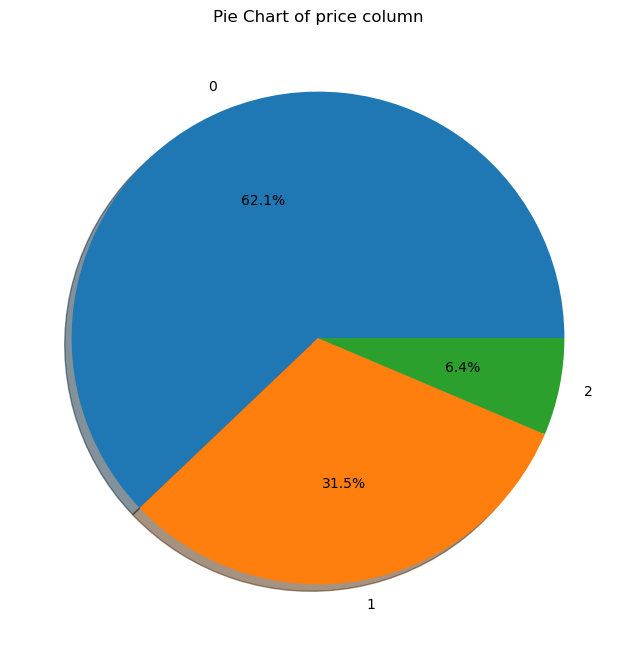

In [ ]:
#display price column unique values
price = df_train.groupby('price').size()

# Make the plot with pandas
price.plot(kind='pie', subplots=True, figsize=(8, 8),shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart of price column")
plt.ylabel("")
plt.show()
     

In [ ]:
#check for missing data
df_train.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

Observation: There are 301 missing values in summary column we should drop them.

In [ ]:
#drop the missing data points
df_train.dropna(inplace=True) 

In [ ]:
#check for missing data
df_train.isnull().sum()

summary    0
image      0
type       0
price      0
dtype: int64

Observation: Now there are no missing values in our dataset.

In [ ]:
#check for duplicated data
df_train.duplicated().sum()

0

Observation: There are no duplicated data.

#### ✔️ Data Translation
After displaying the dataset we found that, it contains two languages (English and French). So we should translate it to one of two languages so we should unify the language to English language by using the translator.

In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=6a68e8468014962cd9b4608ec275d487e127ea42dc1fb72ab8203e253d943683
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [ ]:
from googletrans import Translator
#take object from the class translator
translator = Translator()
#apply the translation process on train & test data and put the result in new column('translate_text')
#we got the text part only by adding(.text) to translator object
df_train['translate_text']= df_train['summary'].apply(lambda x: translator.translate(x,lang_tgt='en').text)
df_test['translate_text']= df_test['summary'].apply(lambda x: translator.translate(x,lang_tgt='en').text)

In [ ]:
df_train['translate_text'].head()

0    Spacious, sunny and cozy modern apartment in t...
1    Located in one of the most vibrant and accessi...
2    Pretty and cozy accommodation 10 minutes from ...
3    Beautiful and spacious (1076 sc ft, / 100 mc) ...
4    Very large ''rustic'' and very pleasant apartm...
Name: translate_text, dtype: object

## Trial 1
We will use tokenization only on text as it contains some text preprocessing and one convolutional layer with some small number of filters on images with max pooling layer after that

I think, To some extent it will give acceptable accuracy as a start as we have two languages in our vocabulary and didnot remove stopwords.

## ✔️ Data Preprocessing
We have image and text data.

- Image data: resize
- Text data: tokenization and converting to integer IDs

In [ ]:
#function to load the images,
#convert them to (black and white) with ALPHA(transparency)--> ('LA mode'), 
#resize them to shape(64,64),
#convert them to arrays of pixels
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64)) # read each image as a greyscale image size (64x64x2)
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64,2))       # if an image can't be loaded, return an array of zeros (same size: 64x64x2)
    return arr

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df_train['summary'].astype('str')

  0%|          | 0/7326 [00:00<?, ?it/s]

Let's encode the prediction labels (type & price) and calculate the total number of unique labels. After, lets split the dataset into training set and testing set.

In [ ]:
# encode the prediction labels
df_train['type'] = df_train['type'].astype('category').cat.codes
df_train['price'] = df_train['price'].astype('category').cat.codes # price category/label, either 0, 1, or 2 corresponding to beginner, plus, or premium respectively

# get the total number of unique outputs (later used for prediction)
len_type = len(df_train['type'].unique())    # number of unique labels for rental type
len_price = len(df_train['price'].unique())  # number of unique labels for price 

# get type 
y_train_type = df_train['type']

# get price
y_train_price = df_train['price']

# print them so we can see the unique values for our labels
print('unique values for type category', len_type, y_train_type.unique())
print('unique values for price category', len_price, y_train_price.unique()) 

unique values for type category 24 [ 1 17 22 10 18 20  8  4 23  2  5 13 15 16 14 11 19  0 21  3  6 12  7  9]
unique values for price category 3 [1 0 2]


#### Here we will use the "Tokenizer":

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf.


It takes some arguments:

- num_words the maximum number of words to keep, based on word frequency 
  Only the most common num_words-1 words will be kept.
- filters a string where each element is a character that will be filtered from the texts. The default is all punctuation, plus tabs and line breaks, minus the ' character.
- lower boolean. Whether to convert the texts to lowercase.
- split str. Separator for word splitting.
- char_level if True, every character will be treated as a token.
- oov_token if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls.

#### Result:

By default, all punctuation is removed, turning the texts into space-separated sequences of words (words maybe include the ' character). These sequences are then split into lists of tokens. They will then be indexed or vectorized.

In [ ]:
# preprocess text data
vocab_size = 45000   # enforce a threshold on the number of unique words that are tokenized
max_len = 300        # maximum sequence length of a text string, anything longer will be truncated to 300 words


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)         # initialize tokenizer with a vocabulary size of 45000
tokenizer.fit_on_texts(x_train_text)                # Updates internal vocabulary based on a list of sequences.


def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text), #Transforms each text in texts to a sequence of integers.
                                                    #Only top num_words-1 most frequent words will be taken into account. 
                                                    #Only words known by the tokenizer will be taken into account.
        
        maxlen=max_len, #Optional Int, maximum length of all sequences. 
                        #If not provided, sequences will be padded to the length of the longest individual sequence.
        
        padding='post', #takes one of 2 values('pre' or 'post') ---> 'pre' is the default value: pad either before or after each sequence.
    )

# preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

#print the shape of new data after applying the preprocessing on it
print(x_train_text_id.shape)
     

(7326, 300)


In [ ]:
#display an example after applying the preprocessing steps
x_train_text_id[100]

array([ 162,   12,  336,    3,   95,   10,  302,  201,    8,  659,    2,
       3017,   12, 1233,    1,   54,   15,    5,    1,  823,   79, 3018,
          5,    3,   45,   97,   12,   32,   73,   63,  405,  379,  740,
        247, 3319,  246,    2,   50,   35,    3,  802,  409,    5,   13,
        119,   11,    3,  216,   33,   54,  366,  107,   75,   63,    3,
       1010,    6,   21,  808,    2,  151,  266,    7,   99,  180,  396,
        435,    1,   52, 1362,  217,  184,  162,   12, 1746, 1166,    1,
       5870,  294,  178,    7,   22,   44,   37,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
# we can use the tokenizer to convert IDs to words.by using "sequences_to_texts" 
pprint(tokenizer.sequences_to_texts(x_train_text_id[:1]))

['spacious sunny and cozy modern apartment in the heart of montreal this 3 '
 'bedroom centrally located in the very popular plateau mont royal '
 'neighborhood in the middle of prince arthur pedestrian only street close to '
 'all amenities restaurants coffee house bars clubs shopping universities '
 'subway stations experience montreal like a real local resident be in the '
 'heart of the action grand prix week grill saint laurent festival mural 2019 '
 'and so much more']


## ✔️ Building a Learning model

### Text part:
- We used Embedding layer enables us to convert each word into a fixed length vector of defined size. The resultant vector is a dense one with having real values instead of just 0's and 1's. The fixed length of word vectors helps us to represent words in a better way along with reduced dimensions.

- Then we used averaged layer to compute the mean of the embeddings to reduce the rank of the embedding.



### image part:
- we used convolutional neural network layer with 10 filters, and a 16x16 mask, no padding.

- Then we used max pooling layer with a 16x16 mask,it reduced the size to 3x3x10.

- After that, we used flatten layer to flatten the multi-dimensional input tensors into a single dimension that it was (90,).

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))                  # input shape for batches of text sequences (300 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2))               # input shape for batches of images (size: 64x64x2)

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text) # get our word embeddings
averaged = tf.reduce_mean(embedded, axis=1)                          # compute the mean of the embeddings to reduce the rank of the embedding

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image)           # convolutional layer with 10 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov1)                                      # max pooling with a 16x16 mask, reducing the size to 3x3x10
flattened = Flatten()(pl)                                           # flatten the shape to (90,)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)                   # concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,  # text inputs
        'image': in_image    # images inputs
    },
    outputs={
        'type': p_type,      # label 1: type category [0-23]
        'price': p_price     # label 2: price category (0, 1, or 2)
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(.001),       # using Adam for optimization with learning rate (.001)

    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    # Not equally weight the loss w.r.t. both labels as we care more with price
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the structure of the model that we defined  
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 49, 49, 10)   5130        ['input_7[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 300, 300)     13500000    ['input_6[0][0]']                
                                                                                            

## ✔️ Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on type prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    # our outputs: price and rental type categories
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=15,            # train for 15 epochs (iterations over all training data)
    batch_size=16,        # batch size of 16 (samples processed before updating gradients)
    validation_split=0.2, # we set our validation splits percentage for our two input sets and our two target attributes is .20%
    # use early stopping, monitor the validation price loss and if it does not improve for 10 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1            # one line per epoch displaying performance metrics
)

Epoch 1/15
367/367 [==============================] - 29s 74ms/step - loss: 0.8453 - price_loss: 0.8453 - type_loss: 3.1657 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.0224 - val_loss: 0.8127 - val_price_loss: 0.8127 - val_type_loss: 3.1606 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.0225
Epoch 2/15
367/367 [==============================] - 10s 27ms/step - loss: 0.7965 - price_loss: 0.7965 - type_loss: 3.1605 - price_sparse_categorical_accuracy: 0.6273 - type_sparse_categorical_accuracy: 0.0224 - val_loss: 0.7699 - val_price_loss: 0.7699 - val_type_loss: 3.1627 - val_price_sparse_categorical_accuracy: 0.6351 - val_type_sparse_categorical_accuracy: 0.0225
Epoch 3/15
367/367 [==============================] - 5s 13ms/step - loss: 0.7384 - price_loss: 0.7384 - type_loss: 3.1596 - price_sparse_categorical_accuracy: 0.6672 - type_sparse_categorical_accuracy: 0.0224 - val_loss: 0.7316 - val_price_loss: 0.731

### ✔️ Model Visualization

In [ ]:
# helper functions (adopted from template code, as usual)

# method used to plot history after training to explore model behaviour
def visualization(history):

  # generate a figure containing 3 plots displayed horizontally
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
  fig.suptitle('Model Results', fontsize='large',fontweight='bold')
  
  # first we display the training price accuracy vs. the validation price accuracy
  ax1.plot(history.history['price_sparse_categorical_accuracy'])
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'])
  ax1.set_title('price accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train_price', 'validation_price'], loc='upper left')

  # same with the other specified accuracy metric, type accuracy
  ax2.plot(history.history['type_sparse_categorical_accuracy'])
  ax2.plot(history.history['val_type_sparse_categorical_accuracy'])
  ax2.set_title('type accuracy')
  ax2.set_ylabel('accuracy')
  ax2.set_xlabel('epoch')
  ax2.legend(['train_type', 'validation_type'], loc='upper left')

  # on the last axis, we plot the training loss against the validation loss (w.r.t. price and type combined)
  ax3.plot(history.history['loss'])
  ax3.plot(history.history['val_loss'])
  ax3.set_title('model loss')
  ax3.set_ylabel('loss')
  ax3.set_xlabel('epoch')
  ax3.legend(['train', 'validation'], loc='upper left')

  # display the figure
  plt.show() 

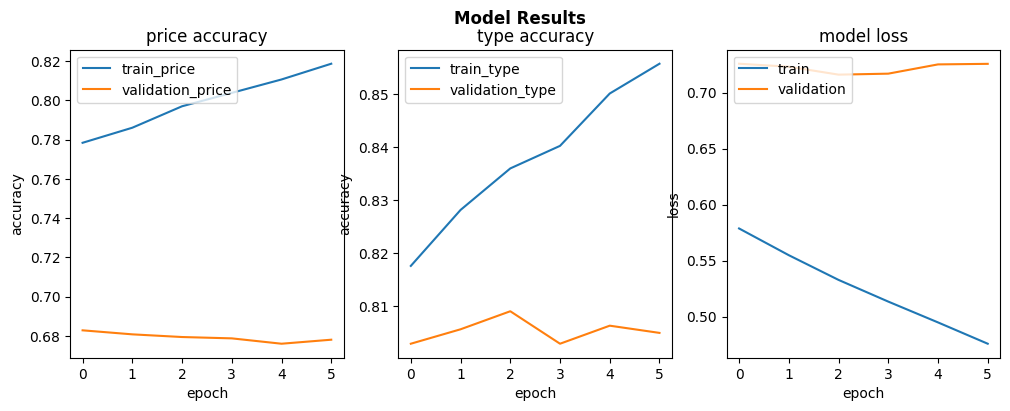

In [ ]:
# let's look at the accuracy and loss curves from the template
visualization(history)

### Observation:

- We noticed that training accuracy reached ~ 82% but only ~ 69%. And the test loss was quite fixed along with epochs. So it seems that the model suffers from the overfitting problem.

- That is because the model learnt the detail and noise in the training data to the extent that it negatively impacted the performance of the model on new data. This meant that the noise or random fluctuations in the training data is picked up and learnt as concepts by the model and caused overfitting problem.

#### ✔️ Data Preprocessing (Testing)
Here we use the trained tokenizer to pre-process the testing set.

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test['image'])])  # load and resize the images from the test set

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(df_test['summary'].astype('str'))                # create sequences for the text summaries in the test set

  0%|          | 0/7360 [00:00<?, ?it/s]

#### ✔️ Prediction

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)     # probability the sample belongs to each of the categories

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)  # pick the highest value, and assign it as the predicted class
print(price_category_predicted)                                # print the categorical predictions, which are in [0,1,2]

230/230 [==============================] - 1s 4ms/step
[[0.6197808  0.32736382 0.05285536]
 [0.3538294  0.50252277 0.14364779]
 [0.15583517 0.5489766  0.29518822]
 ...
 [0.6693711  0.28697765 0.04365117]
 [0.9959203  0.0026128  0.00146683]
 [0.68333364 0.26135707 0.05530924]]
[0 1 1 ... 0 0 0]


In [ ]:
# create the submission dataframe/csv for submissionpd.
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
            ).to_csv('submission.csv', index=False)

In [ ]:
#clear session
tf.keras.backend.clear_session()

# Trial 2
##### We will apply english translation over our data to unify our language to english and use the rest operations as the previous trial

I think, it may increase the accuracy as it will collect more words with the same meaning from the two languages and that will enhance the accuracy and decrease the overfitting.

## ✔️ Data Preprocessing
We have image and text data.

- Image data: resize
- Text data: tokenization and converting to integer IDs

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df_train['translate_text'].astype('str')

  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
# # preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

### ✔️ Building a Learning model
Word embeddings also represent words in an array, not in the form of 0s and 1s but continuous vectors. They can represent any word in few dimensions, mostly based on the number of unique words in our text. They are dense, low dimensional vectors Not hardcoded but are “learned” through data.

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (16, 16) size of filter
pl = MaxPool2D((16, 16))(cov1)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     13500000    ['input_1[0][0]']                
                                                                                              

### ✔️ Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on type prediction (assuming that it is the main task we would like to perform)

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=11,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10)
    ],
    verbose=1
)

Epoch 1/11
367/367 [==============================] - 19s 49ms/step - loss: 0.8468 - price_loss: 0.8468 - type_loss: 3.2101 - price_sparse_categorical_accuracy: 0.6176 - type_sparse_categorical_accuracy: 0.0039 - val_loss: 0.8118 - val_price_loss: 0.8118 - val_type_loss: 3.2171 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/11
367/367 [==============================] - 6s 15ms/step - loss: 0.7963 - price_loss: 0.7963 - type_loss: 3.2124 - price_sparse_categorical_accuracy: 0.6268 - type_sparse_categorical_accuracy: 3.4130e-04 - val_loss: 0.7663 - val_price_loss: 0.7663 - val_type_loss: 3.2123 - val_price_sparse_categorical_accuracy: 0.6426 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/11
367/367 [==============================] - 5s 12ms/step - loss: 0.7369 - price_loss: 0.7369 - type_loss: 3.2096 - price_sparse_categorical_accuracy: 0.6638 - type_sparse_categorical_accuracy: 3.4130e-04 - val_loss: 0.7298 - val_pr

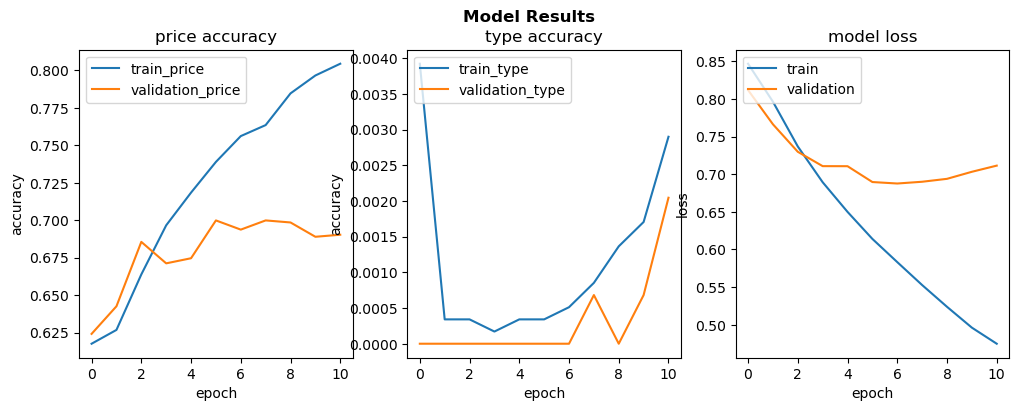

In [ ]:
# let's look at the accuracy and loss curves from the template
visualization(history)

#### Observation:

The training accuracy was ~80% and the validation accuraccy was ~69% which wasnot better than the previous trial but the overfitting problem somewhat decreased.

The overfitting problem has decreased because we translated the french to english and the train data and validation data became more close in syntax and grammer of language.

#### ✔️ Data Preprocessing (Testing)
Here we use the trained tokenizer to pre-process the testing set.

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(df_test['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 2ms/step
[[8.2208967e-01 1.6084342e-01 1.7066939e-02]
 [6.0830498e-01 3.3429989e-01 5.7395160e-02]
 [3.4760123e-01 5.0198942e-01 1.5040933e-01]
 ...
 [8.3882338e-01 1.4768392e-01 1.3492688e-02]
 [9.9627507e-01 2.9636405e-03 7.6130073e-04]
 [8.4018344e-01 1.4397423e-01 1.5842328e-02]]
[0 0 1 ... 0 0 0]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission2.csv', index=False)

In [ ]:
#clear session
tf.keras.backend.clear_session()

## Trial 3
We will use the same as the previous trial but with adding the LSTM layer in text part with some adjustments that they are:

1. give the two targets(price & type) equal loss_weights(.5) instead of (1&0 for type)

2. add dropout to both text & image parts so we can overcome overfitting

3. use different optimizer(sgd)

LSTMs have an edge over conventional feed-forward neural networks and RNN in many ways. This is because of their property of selectively remembering patterns for long durations of time. If we use appropriate layers of embedding and encoding in LSTM, the model will be able to find out the actual meaning in input string and will give the most accurate output class.

Plan: I will replace the reduce_mean layer with an LSTM layer and vary the number of units. This should make an improvement over just taking the mean of each set of embeddings for a sentence.

## ✔️ Data Preprocessing
We have image and text data.

- Image data: resize
- Text data: tokenization and converting to integer IDs

In [ ]:

# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df_train['translate_text'].astype('str')


  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
# # preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

### ✔️ Building a Learning model
As we mentioned before we use an embedding layer, because word embeddings are better at capturing context and are spatially more efficient than one-hot vector representations.

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
dropout= Dropout(.4)(embedded)
lstm = LSTM(5)(dropout)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 32 number of filters and  (16, 16) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([lstm, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=SGD(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 10)   5130        ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 300, 300)     13500000    ['input_3[0][0]']                
                                                                                            

### ✔️ Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on type prediction (assuming that it is the main task we would like to perform)

In [ ]:

history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1
)

Epoch 1/15


2023-04-11 21:50:20.607533: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


367/367 [==============================] - 23s 55ms/step - loss: 1.7688 - price_loss: 0.9690 - type_loss: 2.5686 - price_sparse_categorical_accuracy: 0.6109 - type_sparse_categorical_accuracy: 0.7381 - val_loss: 1.3698 - val_price_loss: 0.8773 - val_type_loss: 1.8624 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/15
367/367 [==============================] - 8s 22ms/step - loss: 1.1753 - price_loss: 0.8586 - type_loss: 1.4920 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 1.0408 - val_price_loss: 0.8391 - val_type_loss: 1.2425 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/15
367/367 [==============================] - 7s 18ms/step - loss: 1.0406 - price_loss: 0.8422 - type_loss: 1.2390 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.9936 - val_price_loss: 0.8320 - val_type

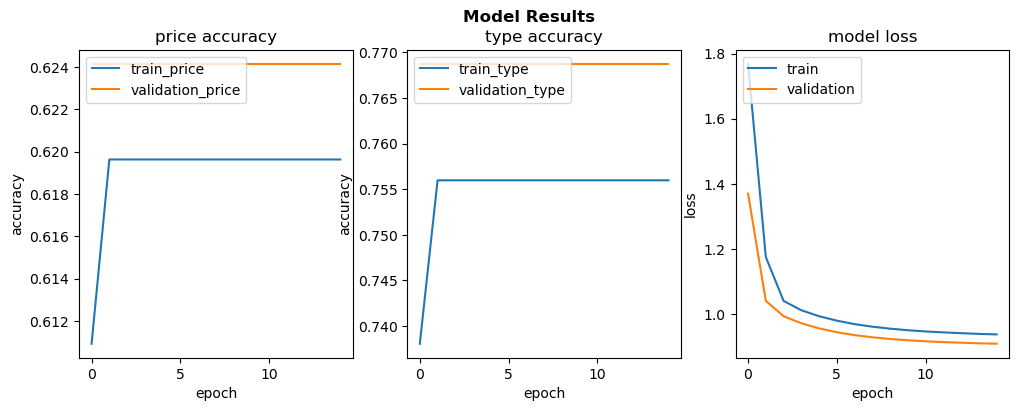

In [ ]:
# let's look at the accuracy and loss curves from the template
visualization(history)

Observation:

- I tried adam and sgd optimizers and got the same results that they were:

1) The training & validation accuracies are getting fixed at some point and close to each other.

2) But our model still suffer from the overfitting problem after adding dropout layers in both parts image and text.

- If the accuracy is not changing, it means the optimizer has found a local minimum for the loss. This may be an undesirable minimum. One common local minimum is to always predict the class with the most number of data points. we should use weighting on the classes to avoid this minimum.

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(df_test['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:

# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 2s 5ms/step
[[0.62141025 0.31528148 0.06330831]
 [0.62141025 0.31528148 0.06330831]
 [0.62141025 0.31528148 0.06330831]
 ...
 [0.62141025 0.31528148 0.06330831]
 [0.62141025 0.31528148 0.06330831]
 [0.62141025 0.31528148 0.06330831]]
[0 0 0 ... 0 0 0]


In [ ]:

#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission3.csv', index=False)

In [ ]:
#clear session
tf.keras.backend.clear_session()

# Trial 4
we will use the same as previous trail except replacing lstm layer with bi-directional lasm layer

Bi-LSTMs usually provide slightly better results than using a single LSTM for most NLP tasks, not only Named Entity Recognition, because a word's context in a sentence includes future words as well as previous words.

plan:

- We will use bi-directional layer here that will increase the accuracy because of the adventage of it over lstm that we mentiones above.

- Add class weight or oversampling technique later will solve the problem of unbalanced classes, overcome overfitting and increase the accuracy. But class weight used in single output only.

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df_train['translate_text'].astype('str')

  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
 # preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
dropout= Dropout(.4)(embedded)
bi_directional =  Bidirectional(LSTM(5))(dropout)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (15, 15) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([bi_directional, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     13500000    ['input_1[0][0]']                
                                                                                              

In [ ]:

history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1
)

Epoch 1/15


2023-04-11 22:07:52.161443: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


367/367 [==============================] - 29s 66ms/step - loss: 1.1990 - price_loss: 0.8578 - type_loss: 1.5401 - price_sparse_categorical_accuracy: 0.6143 - type_sparse_categorical_accuracy: 0.7085 - val_loss: 0.9058 - val_price_loss: 0.8263 - val_type_loss: 0.9853 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/15
367/367 [==============================] - 13s 35ms/step - loss: 0.8978 - price_loss: 0.8171 - type_loss: 0.9786 - price_sparse_categorical_accuracy: 0.6189 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8479 - val_price_loss: 0.7927 - val_type_loss: 0.9032 - val_price_sparse_categorical_accuracy: 0.6248 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/15
367/367 [==============================] - 10s 28ms/step - loss: 0.8205 - price_loss: 0.7634 - type_loss: 0.8775 - price_sparse_categorical_accuracy: 0.6398 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8112 - val_price_loss: 0.7558 - val_ty

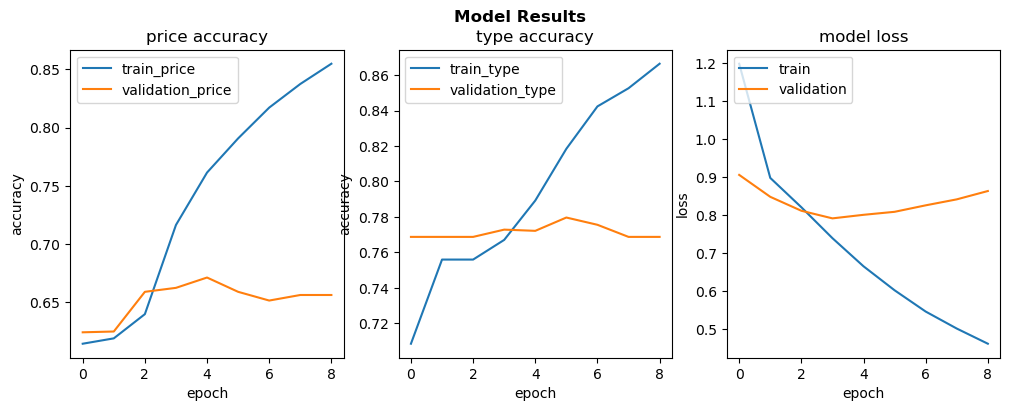

In [ ]:
# let's look at the accuracy and loss curves from the template
visualization(history)

Observation: There is no enhancement in acuuracy and it is quite fixed at somewhat point at case of training and validation after adding bi directional method because the model still suffer from unbalanced data problem.

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(df_test['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:

# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


230/230 [==============================] - 3s 9ms/step
[[0.8962075  0.08436795 0.01942456]
 [0.75129294 0.21348654 0.03522053]
 [0.11261581 0.71617746 0.17120682]
 ...
 [0.87425065 0.10303882 0.0227105 ]
 [0.9373975  0.05596883 0.00663374]
 [0.51643646 0.44524583 0.03831776]]
[0 0 1 ... 0 0 0]


In [ ]:

#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission4.csv', index=False)

In [ ]:
#clear session
tf.keras.backend.clear_session()

# Trial 5
We will do the same as the previous trial but with replacing bi directional lstm layer with GRU layer

In terms of model training speed, GRU is 29.29% faster than LSTM for processing the same dataset; and in terms of performance, GRU performance will surpass LSTM in the scenario of long text and small dataset, and inferior to LSTM in other scenarios.

plan: adding GRU with different nuber of units will enhance speed and performance on data.

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df_train['translate_text'].astype('str')

  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
# # preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
dropout= Dropout(.4)(embedded)
GRU = GRU(20)(dropout) # fewer hidden units might improve training time?

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (15, 15) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([GRU, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': .5,
        'price': .5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     13500000    ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1
)

Epoch 1/15


2023-04-11 22:33:18.624773: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


367/367 [==============================] - 22s 53ms/step - loss: 1.0249 - price_loss: 0.8512 - type_loss: 1.1986 - price_sparse_categorical_accuracy: 0.6193 - type_sparse_categorical_accuracy: 0.7503 - val_loss: 0.9015 - val_price_loss: 0.8360 - val_type_loss: 0.9669 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/15
367/367 [==============================] - 8s 23ms/step - loss: 0.9261 - price_loss: 0.8394 - type_loss: 1.0128 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8979 - val_price_loss: 0.8310 - val_type_loss: 0.9648 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/15
367/367 [==============================] - 8s 22ms/step - loss: 0.9246 - price_loss: 0.8387 - type_loss: 1.0104 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8968 - val_price_loss: 0.8305 - val_type

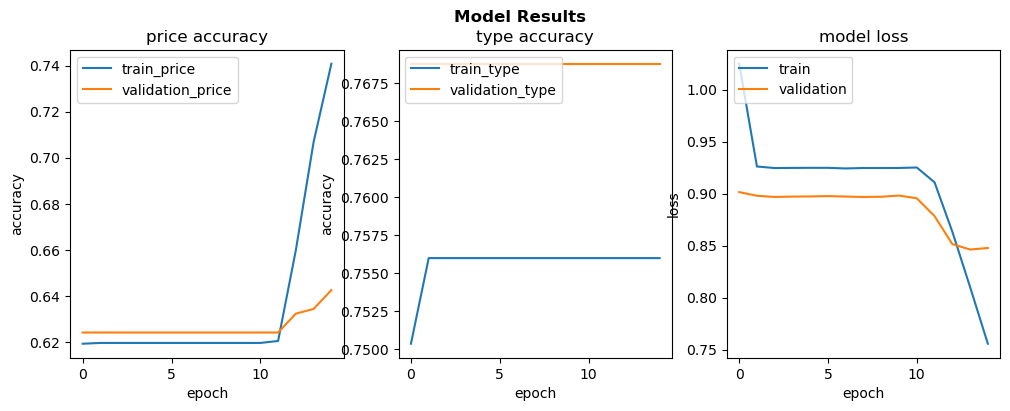

In [ ]:
# let's look at the accuracy and loss curves from the template
visualization(history)

Observation: we noticed the faster processing of GRU than the previous trials but still the accuracy is fixed but the loss is quite good in both cases.

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(df_test['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 2s 5ms/step
[[0.39311904 0.5084397  0.09844125]
 [0.587428   0.35864878 0.05392326]
 [0.21157461 0.6130959  0.17532948]
 ...
 [0.82357484 0.15340318 0.02302196]
 [0.8517215  0.12840067 0.01987787]
 [0.8394959  0.13942243 0.02108168]]
[1 0 1 ... 0 0 0]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission5.csv', index=False)
     

In [ ]:
#clear session
tf.keras.backend.clear_session()

# Trial 6
In this trial we will use different preprocessing on the text with applying the translation, also we will replce the previous added layers with averaged layer again

Plan: i think it may change alittle bit in accuracy.

In [ ]:
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [ ]:
#taking copy from origional data
df_trail6 = df_train.copy()
df_test_trial6 = df_test.copy()
#drop the missing data points
df_trail6.dropna(inplace=True) 

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_trail6['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df_trail6['translate_text'].astype('str')

  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:

# x_train_text = df_trail5['translate_text'].apply(lambda x: convert_to_lower(x))
# x_train_text = df_trail5['translate_text'].apply(lambda x: remove_punctuation(x))
# x_train_text = df_trail5['translate_text'].apply(lambda x: remove_numbers(x))
x_train_text = df_trail6['translate_text'].apply(lambda x: remove_stopwords(x))
x_train_text = df_trail6['translate_text'].apply(lambda x: remove_extra_white_spaces(x))
x_train_text = df_trail6['translate_text'].apply(lambda x: lemmatizing(x))

In [ ]:
# # preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (16, 16) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 dropout (Dropout)              (None, 49, 49, 10)   0           ['conv2d[0][0]']                 
                                                                                              

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10)
    ],
    verbose=1
)

Epoch 1/15
367/367 [==============================] - 46s 95ms/step - loss: 1.0623 - price_loss: 0.8587 - type_loss: 1.2659 - price_sparse_categorical_accuracy: 0.6138 - type_sparse_categorical_accuracy: 0.7519 - val_loss: 0.8868 - val_price_loss: 0.8191 - val_type_loss: 0.9545 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/15
367/367 [==============================] - 9s 25ms/step - loss: 0.9062 - price_loss: 0.8204 - type_loss: 0.9921 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8723 - val_price_loss: 0.8016 - val_type_loss: 0.9430 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/15
367/367 [==============================] - 6s 17ms/step - loss: 0.8832 - price_loss: 0.7927 - type_loss: 0.9737 - price_sparse_categorical_accuracy: 0.6283 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8569 - val_price_loss: 0.7835

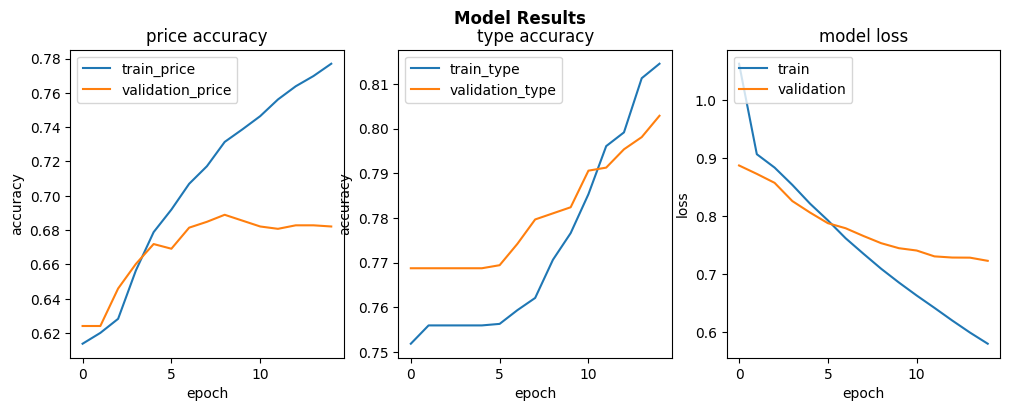

In [ ]:
# let's look at the accuracy and loss curves from the template
visualization(history)

Observation: model loss go in good mannar but the 2 accuracies gab still existed and the model is still suffer from the overfit problem because of the unbalanced data in price catigories.

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test_trial6['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = df_test_trial6['translate_text'].astype('str')

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# x_test_text = df_test_trial5['translate_text'].apply(lambda x: convert_to_lower(x))
# x_test_text = df_test_trial5['translate_text'].apply(lambda x: remove_numbers(x))
# x_test_text = df_test_trial5['translate_text'].apply(lambda x: remove_punctuation(x))
x_test_text = df_test_trial6['translate_text'].apply(lambda x: remove_stopwords(x))
x_test_text = df_test_trial6['translate_text'].apply(lambda x: remove_extra_white_spaces(x))
x_test_text = df_test_trial6['translate_text'].apply(lambda x: lemmatizing(x))

In [ ]:
x_test_text = _preprocess(x_test_text) 

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 3ms/step
[[0.8149249  0.1466382  0.03843692]
 [0.9285774  0.05677532 0.01464723]
 [0.8760987  0.082313   0.04158828]
 ...
 [0.84417    0.13392729 0.02190278]
 [0.97365814 0.01855405 0.00778782]
 [0.785169   0.18733492 0.02749605]]
[0 0 0 ... 0 0 0]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission7.csv', index=False)

# Trial 7
We will use transfer learning model with our problem(VGG 19).

Using it having some adventages includes saving of resources and improved efficiency when training new models hence we expect some enhancement in performance.

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df_train['translate_text'].astype('str')

  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
 # preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 
     

In [ ]:
from tensorflow.keras.applications import VGG19

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d. 
cov1 = Conv2D(10,(16,16), activation='tanh')(in_image) # 10 number of filters  and  (16, 16) size of filter
vgg=VGG19(weights=None, input_shape=(49, 49, 10), include_top=False)(cov1)
flattened = Flatten()(vgg)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_2= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model_2.compile(
    optimizer=Adam(0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_2.summary()

/usr/local/lib/python3.9/dist-packages/keras/applications/vgg19.py:137: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 10 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 10)   5130        ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 300, 300)     13500000    ['input_3[0][0]']                
                                                                                            

In [ ]:
history = model_2.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5 )
    ],
    verbose=1
)

Epoch 1/10
367/367 [==============================] - 50s 111ms/step - loss: 1.0509 - price_loss: 0.8525 - type_loss: 1.2492 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8889 - val_price_loss: 0.8225 - val_type_loss: 0.9554 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/10
367/367 [==============================] - 21s 57ms/step - loss: 0.9097 - price_loss: 0.8257 - type_loss: 0.9938 - price_sparse_categorical_accuracy: 0.6195 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8765 - val_price_loss: 0.8065 - val_type_loss: 0.9465 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/10
367/367 [==============================] - 20s 56ms/step - loss: 0.8877 - price_loss: 0.8003 - type_loss: 0.9751 - price_sparse_categorical_accuracy: 0.6273 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8551 - val_price_loss: 0.7

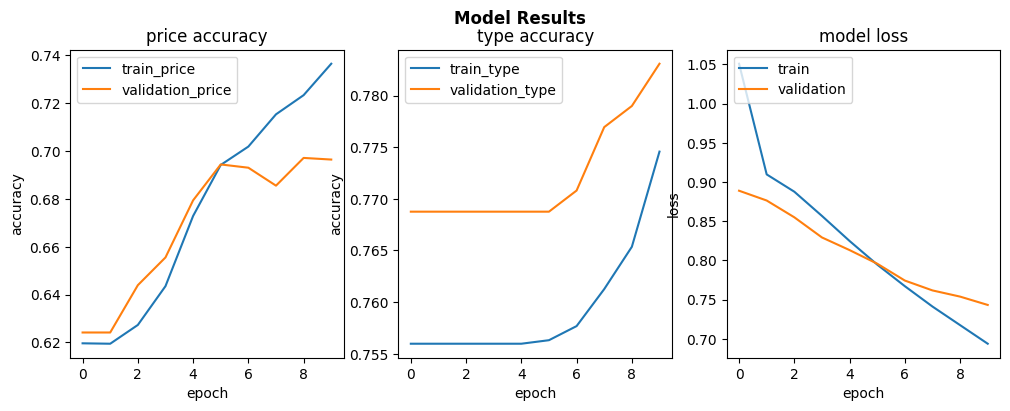

In [ ]:
# let's look at the accuracy and loss curves from the template
visualization(history)

Observation: Using pretrained model (VGG19) has made change in the accuracy because it provides the model with new features that made it learn better than customed model only.

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = df_test['translate_text'].astype('str')

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# x_test_text = df_test_trial5['translate_text'].apply(lambda x: convert_to_lower(x))
# x_test_text = df_test_trial5['translate_text'].apply(lambda x: remove_numbers(x))
# x_test_text = df_test_trial5['translate_text'].apply(lambda x: remove_punctuation(x))
x_test_text = df_test_trial6['translate_text'].apply(lambda x: remove_stopwords(x))
x_test_text = df_test_trial6['translate_text'].apply(lambda x: remove_extra_white_spaces(x))
x_test_text = df_test_trial6['translate_text'].apply(lambda x: lemmatizing(x))

In [ ]:
x_test_text = _preprocess(x_test_text)

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


230/230 [==============================] - 1s 3ms/step
[[0.8149249  0.1466382  0.03843692]
 [0.9285774  0.05677532 0.01464723]
 [0.8760987  0.082313   0.04158828]
 ...
 [0.84417    0.13392729 0.02190278]
 [0.97365814 0.01855405 0.00778782]
 [0.785169   0.18733492 0.02749605]]
[0 0 0 ... 0 0 0]


In [ ]:

#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission9.csv', index=False)